# **Import Libraries and modules**

In this first iteration,  i am trying to build a base vanilla model network , without any kind of augmentation, normalisation or optimization.  Here i will determine how much convolution layers i will use, where all i will put my Maxpooling layer/layers, 1x1 and 3x3 convolutions, calculate the receptive field of each and make it upto a point such that it will cover the size of object, and the initial number of kernels that i will use, positioning of transition layer in the network.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
# It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible 
# delay is key to doing good research.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.
# Sequential - It creates a model that is a linear stack of layers.
# Flatten - It flattens the input and also it does not affect the batch size.
# Convolution2D - This actually performs the 2D convolution on the input vector and produce the convoluted output.
# Dense - It implements the operation that is output i equal to activation(dot(input, kernel) + bias) where activation is the element-wise
# activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer. 
# Dropout - It applies Dropout to the input. It consists of randomly setting a fraction rate of input units to 0 at each update during 
# training time, which helps prevent overfitting.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Loads the mnist training and testing data into respective variables.

(60000, 28, 28)


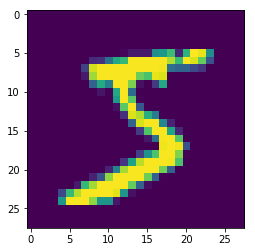

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# Matplotlib is a Python 2D plotting library which produces publication quality figures 
# in a variety of hardcopy formats and interactive environments across platforms. 
# Here we use it to show an example of how an image in a mnist training data looks like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# numpy.reshape() gives a new shape to an array without changing its data.
# Here it is done to indicate the the number of color channels , here it is 1 as it is a grayscale image.
# If it was a RGB it will be changed to 3.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# ndarray.astype() is used to cast a copy of the array to a specified type.
# And we divide the whole training and testing data by 255 to normalise it to values between 0 and 1.

In [11]:
y_train[:10]

# Here we print the training outputs to check whether all 10 distinct outputs are there or not.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# to_categorical - Converts a class vector (integers) to binary class matrix.
# It returns binary matrix representation of the input, where the bit corresponding to each class number wiil be 1 and 
# everything else is 0.

In [13]:
Y_train[:10]

# Here we print out the binary matrix representation of the training output. 


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Receptive Field = 3x3
model.add(Convolution2D(64, 3, 3, activation='relu')) #input_shape=(26,26,32) #Receptive Field = 5x5
model.add(Convolution2D(16, 1, 1, activation='relu')) #input_shape=(24,24,64) #Receptive Field = 5x5
model.add(MaxPooling2D(pool_size=(2, 2))) #input_shape=(24,24,16)

model.add(Convolution2D(32, 3, 3, activation='relu')) #input_shape=(12,12,16) #Receptive Field = 10x10
model.add(Convolution2D(64, 3, 3, activation='relu')) #input_shape=(10,10,32) #Receptive Field = 12x12
model.add(Convolution2D(128, 3, 3, activation='relu')) #input_shape=(8,8,64) #Receptive Field = 14x14
model.add(Convolution2D(128, 3, 3, activation='relu')) #input_shape=(6,6,128) #Receptive Field = 16x16

model.add(Convolution2D(10, 4, 4)) #input_shape=(4,4,128) #Receptive Field = 18x18

model.add(Flatten())
model.add(Activation('softmax'))


# As we know Sequential creates a model that is a linear stack of layers.model.add() adds layers one by one  in this stack.
# Activation - It can be used through an Activation layer, or through the activation argument supported by all forward layers.
# Here we use 'relu 'in the argument of add(). ReLU converts all the pixel values between [-1,1] to [0,1].
# MaxPooling2D - It performs Max pooling operation for spatial data. Here we spcify 2x2 maxpooling , therefore it will take the max 
# value of various 2x2 sections of the image , and the output size of the image will reduce by half or else in other words 
# we filter out 75% of data. 
# At last we flatten the data using Flatten() and using softmax activation to get the final output.
# Softmax - It is used because some vector components could be negative, or greater than one; and might not sum to 1, but after applying 
# softmax,each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.
# And during prediction the highest probability one will be taken as the output and if this matches the ground truth , 
# we have a correct prediction , otherwise a false prediction.
# The first argument of the Convolution2D is the number of 3x3 filters that is used in that layer
# summary() prints the summary of the whole network.

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        1040      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# complile() configures the model for training and we define what all metrics is calculated during training, 
# here its accurancy only.
# categorical_crossentropy- It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN 
# to output a probability over the C-classes for each image.
# Since we have mulitple classes , we use categorical crossentropy to calculate the loss.
# Adam - Adam is an optimization algorithm that can used to update network weights iterative based in training data.
# After calculating the loss, we use adam with the help of the categorical_crossentropy loss calculated of the training data.

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

# fit() trains the above model for a given number of epochs.
# Epochs are the number of iterations on a dataset.
# We also define batch size = 32 , which the number of images passed through the network for each epoch.
# verbose is set to 1 so that we can see the progess bar.

Epoch 1/10
  704/60000 [..............................] - ETA: 14s - loss: 0.2081 - acc: 0.9332

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 11s 184us/step - loss: 0.0831 - acc: 0.9748
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0447 - acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0336 - acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0264 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0226 - acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0180 - acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0169 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0129 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0135 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0095 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# evaluvate() returns the loss value & accuracy for the model in test mode.
# Here also computation is done in batches.

In [21]:
print(score)

# Here we the test score , which is a list of scalars which includes loss and accuracy.

[0.029962693651335214, 0.9916]


In [0]:
y_pred = model.predict(X_test)

# predict() generates output predictions for the input samples.
# Here also computation is done in batches.

In [23]:
print(y_pred[:9])
print(y_test[:9])

# Here we print the output predictions from the model and the outputs from the ground truth, 
# to check how much correct predictions we got.

[[1.2312819e-18 2.2883254e-14 2.4927191e-11 3.0262412e-10 4.1051283e-19
  2.0503656e-14 5.5397221e-23 1.0000000e+00 1.9473930e-13 1.6030374e-09]
 [5.4896254e-11 8.1575535e-10 1.0000000e+00 5.1121329e-11 1.0448716e-11
  6.2227343e-14 4.5309951e-09 3.5433932e-12 2.7728472e-11 8.2598333e-15]
 [2.0970626e-11 9.9999976e-01 2.5100590e-07 7.9356461e-12 5.0551885e-10
  6.1856507e-09 1.3139918e-10 2.6500595e-08 5.4633091e-08 4.7937800e-12]
 [9.9999988e-01 4.8201992e-14 5.7818104e-11 2.0627787e-08 1.2718376e-12
  8.7907237e-10 1.2128896e-07 2.9806633e-11 1.6841865e-10 1.4734558e-09]
 [7.5095846e-11 1.4182255e-09 5.5560306e-11 4.3827687e-14 1.0000000e+00
  1.0775553e-09 4.1532637e-12 1.1582163e-11 3.9085184e-09 2.2400780e-08]
 [1.7489536e-14 1.0000000e+00 4.1172509e-08 3.4915014e-15 2.5878003e-10
  2.6899190e-12 5.6988776e-14 1.1675042e-09 1.0617272e-10 2.8363855e-14]
 [3.9606464e-14 5.3907606e-10 9.5234009e-13 1.4140320e-17 9.9999917e-01
  1.1081139e-13 9.9372794e-17 7.9492422e-09 3.6059851e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print (layer_dict)

# Creates a dictionary of convolution layers outputs with their corresponding layer names. 

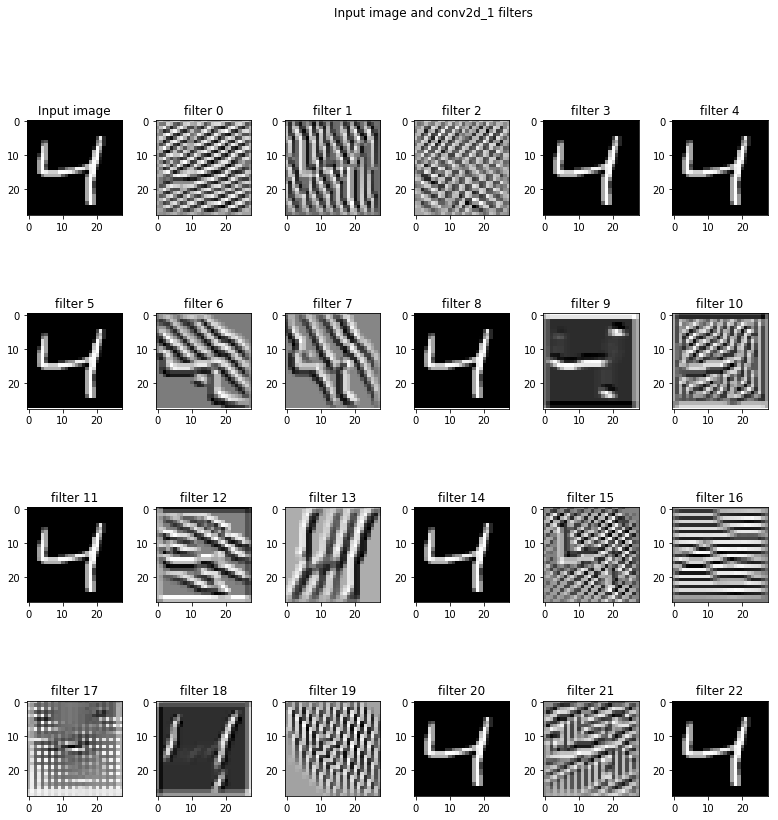

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


# This part of code prints out the the matplot visualizations of any convolution layer, including the input image
# and its filter images. We just have to specify the convolution layer name.
# deprocess_image() converts the tensor into a valid image
# vis_img_in_filter() does the rest of the processing for each filter in a layer.

Observations

In this base network, i used more number of kernels each layer of convolutions, and the number of convolutions is 8. The total receptive field is at 22x22 , but its still enough because the last few rows and columns doesnt contain any data. And the total number of parameters are near 285 , 000. After 10 epoch with a batch size of 32, i got a validation accuracy of 99.16.